# Лабораторная работа №2
## А-13а-20 Партин М. Ю.
## Вариант 17
### Задание 2.1

**Формулировка задания:** вещественные корни алгебраического уравнения $ P(x) = 0 $ с точностью $ \varepsilon = 10^{-8} $ 

Уравнение, заданное в задаче: $ P(x) = 9,8x^{3} + 10x^{2} - 8,8x - 4,2 $ 

Построение графика функции

In [2]:
%matplotlib inline 
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Функция заданная в условие
def P(x):
    return 9.8 * x**3 + 10 * x**2 - 8.8 * x - 4.2

Задаем отрезок, на котором будут находится корни исходного уравнения.
Был найден путем исследования функции

In [3]:
# Задаем отрезок, на котором будет строится график функции
a = -2
b = 2
x_data = np.linspace(a, b, 10000)

Строим график функции, а также график функции y = 0, для того чтобы отчетливо были видны корни уравнения.

Также задаем сетку на графике, для того чтобы было понятно, где находятся корни

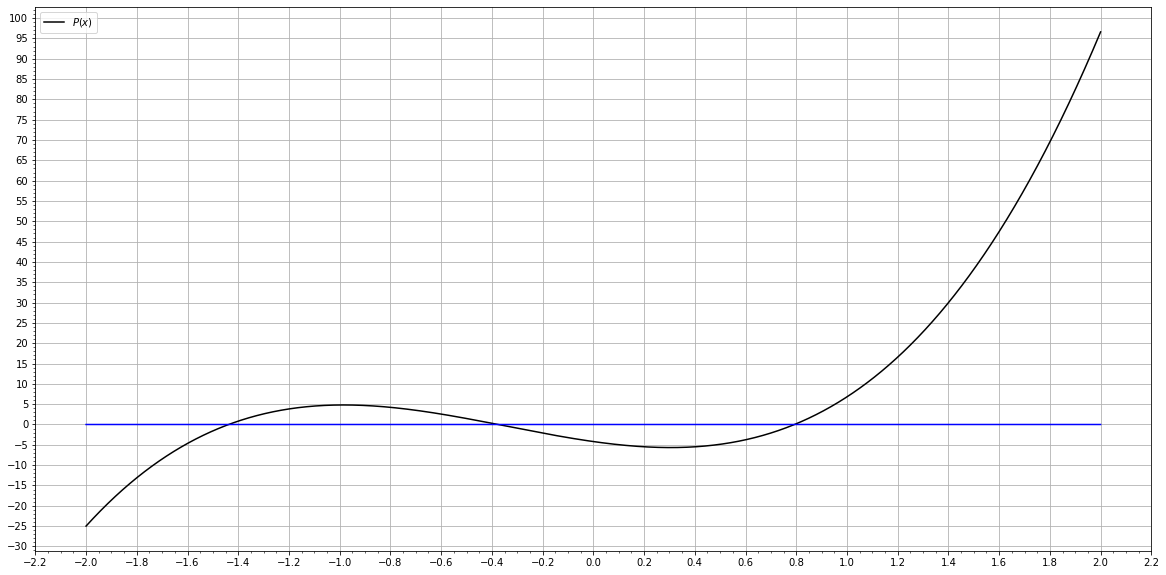

In [4]:
# Функция для построения графика y = 0 (оси X)
def AxsX(x):
    return x * 0;

fig, axs = plt.subplots(1, 1, figsize=(20, 10))
axs.plot(x_data, P(x_data), label = "$P(x)$", color = "black")
axs.plot(x_data, AxsX(x_data), color = "blue")

axs.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
axs.yaxis.set_major_locator(ticker.MultipleLocator(5))
axs.minorticks_on()
axs.grid(True)

axs.legend()

По графику видно, что уравнение имеет три корня

Отрезок локализации первого корня $ x_1 \in [-1,6, -1,2] $ 

Отрезок локализации второго корня $ x_2 \in [-0,6, -0,2] $ 

Отрезок локализации первого корня $ x_3 \in [0,6, 1,0] $ 

Теперь построим график производной функции P(x)

$ P^{\prime}(x) = 29,4x ^ 2 + 20x - 8.8 $

In [5]:
# Произодная функции P(x)
def DerivativeP(x):
    return 29.4 * x * x + 20 * x - 8.8

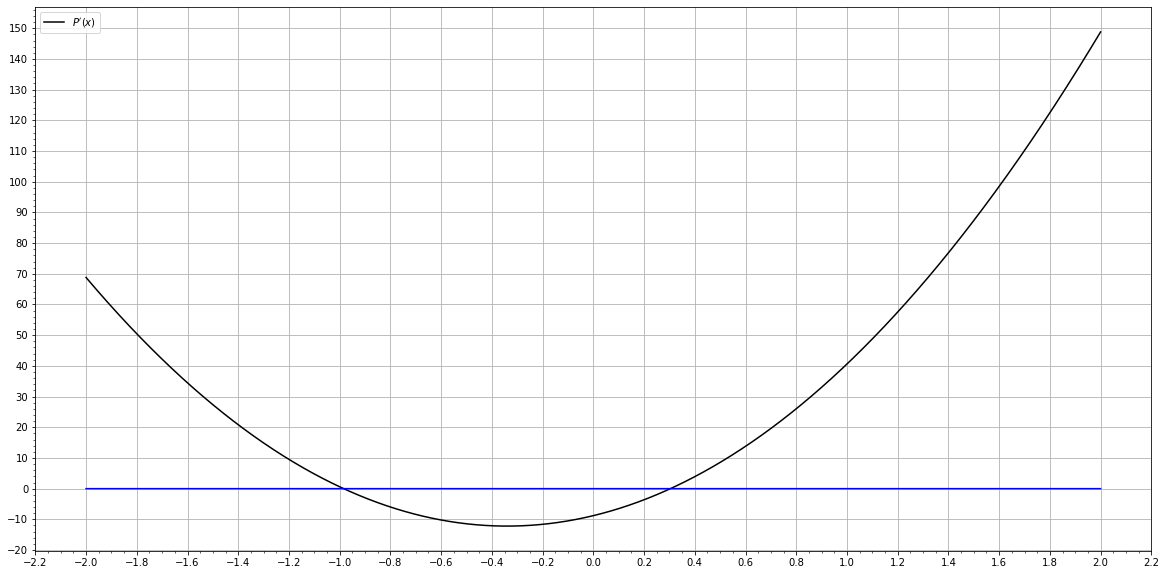

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(20, 10))
axs.plot(x_data, DerivativeP(x_data), label = "$P^\prime(x)$", color = "black")
axs.plot(x_data, AxsX(x_data), color = "blue")
axs.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
axs.yaxis.set_major_locator(ticker.MultipleLocator(10))
axs.minorticks_on()
axs.grid(True)
axs.legend()

По графику производной функции $ P(x) $ имеем, что она на всех отрезках локализации имеет постоянный знак.

Следовательно, мы имеем возможность применить метод простой итерации с параметром

Будем искать сжимающее отображение $ \varphi (x) $

В следующем виде:

$ \varphi (x) = x - \alpha P(x) $

где $ \alpha $ - это итерационный параметр

Чтобы найти его, воспользуемся следующей формулой

$$ \alpha = \frac{2}{M + m} $$

$$ M = \max_{[a, b]}{P^{\prime}(x)} $$

$$ m = \min_{[a, b]}{P^{\prime}(x)} $$

$ [a, b] $ - отрезок локализации корня x

Теперь осталось только записать условие окончания метода простой итерации. И можно переходить к его реализации

$$ \left|x_{n} - x_{n - 1}\right| \leq \frac{1 - q}{q} \varepsilon $$

Где параметр q можно найти по формуле

$$ q = \left|\frac{M - m}{M + m} \right| $$ 

И расчетная формула следующая

$$ x_{n + 1} = x_{n} - \alpha P(x) $$

$ x_{n} $ - приближение к корню, полученное на n-ой итерации

Перейдем к программированию метода


In [7]:
# Максимумы и минимумы по графику производной
M = [35, -10, 40]
m = [10, -11, 15]

# Массив значений параметра alpha и массив значений параметра q
alpha = [0, 0, 0]
q = [0, 0, 0]

# Заполняем эти значения по формулах, приведенным выше
for i in range(3):
    alpha[i] = 2 / (M[i] + m[i])
    q[i] = abs((M[i] - m[i]) / (M[i] + m[i]))

In [8]:


# Точность, с которой надо найти корни
eps = 10**(-8)

# Для метода простой итерации нужно начальное приближение x0, в качестве него возьмем середину отрезка локализации
x = [-1.4, -0.4, 0.8]

# Массив для хранения количества итерации
iters = [0, 0, 0]

# Реализация метода простой итерации
def SimpleIteration(x, alpha, eps, q):
    eps = eps * (1 - q) / q
    it = 0
    phi_x = x - alpha * P(x)
    while abs(phi_x - x) > eps:
        x = phi_x
        phi_x = x - alpha * P(x)
        it += 1
    return (it, x)


for i in range(3):
    iters[i], x[i] = SimpleIteration(x[i], alpha[i], eps, q[i])

# Вывод полученных значений
print("Число итерации, понадобившихся чтобы найти корень", iters)
print("Найденные корни", x)


Число итерации, понадобившихся чтобы найти корень [5, 7, 5]
Найденные корни [-1.4376535911055655, -0.37586694499502626, 0.7931124437986018]


Занесем найденные результаты в таблицу

Номер корня | Отрезок локализации | Найденное приближенное значение | Число итерации
--- | --- | --- | ---
1 | $ [-1,6, -1,2] $ | $ -1,43765359 \pm 0,00000001 $ | 5
2 | $ [-0,6, -0,2] $  | $ -0,37586694 \pm  0,00000001 $ | 7
3 | $ [0,6, 1,0] $ | $ 0,79311244 \pm   0,00000001 $ | 5

## Задание 2.2

Дано уравнение $ f(x) = 0 $. Найти все  корни уравнения с заданной точностью $ \varepsilon = 10^{-12} $ на указанном отрезке $ [a,b] $. Для решения задачи использовать метод Ньютона и метод, указанный в индивидуальном варианте (метод бисекции). Сравнить количество итераций, потребовавшихся для достижения заданной точности каждым методом

Функция, заданная по условию задачи

$ f(x) = x \cos ^ {2} (3x) - 3 ^ {-x - 0,5} $

Заданный отрезок

$ [a, b] = [0, 3] $

Построим график данной функции на заданном отрезке и найдем отрезки локализации

In [9]:
# Функция заданная по условию задачи
def f(x):
    return x * (np.cos(3 * x) ** 2) - 3**(-x - 0.5)

# Отрезок, на котором ищутся корни заданной функции
a = 0
b = 3

x_data = np.linspace(a, b, 10000)

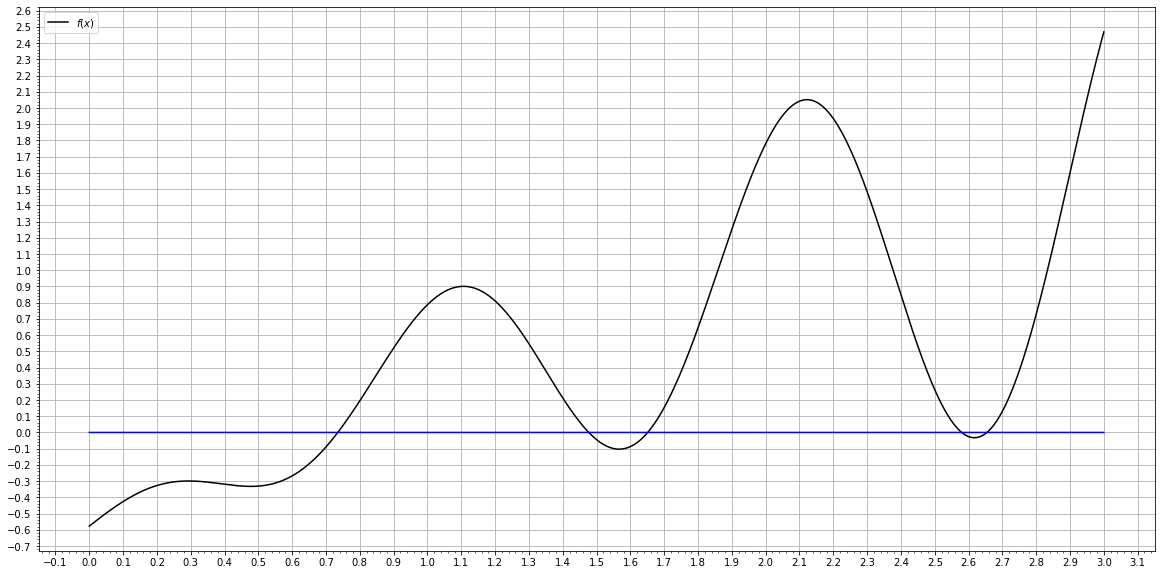

In [10]:
# Построение графика функции

fig, axs = plt.subplots(1, 1, figsize = (20, 10))

axs.plot(x_data, f(x_data), label = "$f(x)$", color = "black")
axs.plot(x_data, AxsX(x_data), color = "blue")

axs.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
axs.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
axs.minorticks_on()
axs.grid(True)

axs.legend()

Исходное уравнение имеет пять корней на заданном отрезке. Запишем их отрезки локализации

Первый корень $ x_1 \in [0,7, 0,8] $

Второй корень $ x_2 \in [1,4, 1,5] $

Третий корень $ x_3 \in [1,6, 1,7] $

Четвертый корень $ x_4 \in [2,5, 2,6] $

Пятый корень $ x_5 \in [2,6, 2,7] $

Запишем расчетные формулы

I) Метод Ньютона

$ x_{n + 1} = x_{n} - \frac{f(x_n)}{f^{\prime}(x_n)} $

Условие окончания метода Ньютона следующее:

$ \left|x_{n+1} - x_n \right| \leq \varepsilon $

Найдем производную функции f(x)

$$ f^{\prime}(x) = \cos ^ {2} (3x) - 6 \cdot x \cdot \sin(3x) \cdot cos(3x) + 3 ^ {-x - 0,5} \cdot \ln{3}  $$ 

Тогда расчетная формула метода Ньютона имеет вид

$$ x_{n + 1} = x_{n} - \frac{x_n \cos ^ {2} (3x_n) - 3 ^ {-x_n - 0,5}}{\cos ^ {2} (3x_n) - 6 \cdot x_n \cdot \sin(3x_n) \cdot cos(3x_n) + 3 ^ {-x_n - 0,5} \cdot \ln{3}} $$ 

II) Метод бисекции

Расчетная формула имеет следующий вид

Метод заключается в следующем. Обозначим исходный отрезок локализации $[a_0, b_0] $  и найдем его середину $ x_0 = \frac{a_0 + b_0}{2} $. Из получившихся двух отрезков находим новый отрезок локализации  , выбирая тот, на котором функция   меняет знак: если  $ f(a_0)f(x_0) < 0 $, то полагаем $[a_1, b_1] = [a_0, x_0] $, иначе выбираем $[a_1, b_1] = [x_0, b_0] $ . Находим середину найденного отрезка $ x_1 $, после чего определяем очередной отрезок локализации $ [a_2, b_2] $ и т.д. 

Условие окончания метода Ньютона.

$\left|x_n - x_{n - 1} \right| \leq 2\varepsilon $

In [11]:
# Производная функции
def derivativef(x):
    return np.cos(3*x)**2 - 6*x*np.sin(3*x)*np.cos(3*x) + 3**(-x-0.5) * np.log(3)

In [12]:
# Реализация метода Ньютона
def Newtone(x, eps):
    it = 0
    x_n = x - f(x) / derivativef(x)
    while abs(x - x_n) > eps:
        x = x_n
        x_n = x - f(x) / derivativef(x)
        it += 1
    return (it, x)


# Реализация метод Бисекции
def Bisection(a, b, eps):
    it = 0
    while (b - a) > 2 * eps:
        x = (a + b) / 2
        if f(a) * f(x) < 0:
            b = x
        else:
            a = x
        it += 1
    return (it, x)

In [13]:
# Отрезки локализации
local_segments = [[0.7, 0.8], [1.4, 1.5], [1.6, 1.7], [2.5, 2.6], [2.6, 2.7]]

# Массивы для хранения числа итераций и приближенного значение корней каждого из методов
iters_Newtone = [0, 0, 0, 0, 0]
iters_Bisection = [0, 0, 0, 0, 0]
roots_Newtone = [0.0, 0.0, 0.0, 0.0, 0.0]
roots_Bisection = [0.0, 0.0, 0.0, 0.0, 0.0]

# Заданная точность, с которой надо найти корни
eps = 10 ** (-12)

for i in range(5):
    iters_Bisection[i], roots_Bisection[i] = Bisection(local_segments[i][0], local_segments[i][1], eps)
    iters_Newtone[i], roots_Newtone[i] = Newtone((local_segments[i][0] + local_segments[i][1]) / 2, eps)                                           

In [14]:
# Выведем найденные корни
print("Метод бисекции")
print("Число итерации, понадобившихся чтобы найти корень", iters_Bisection)
print("Найденные корни", roots_Bisection)

print("Метод Ньютона")
print("Число итерации, понадобившихся чтобы найти корень", iters_Newtone)
print("Найденные корни", roots_Newtone)


Метод бисекции
Число итерации, понадобившихся чтобы найти корень [36, 36, 36, 36, 36]
Найденные корни [0.7347914756202953, 1.4769721596487217, 1.6511525402820544, 2.5796794499692632, 2.6542421068603295]
Метод Ньютона
Число итерации, понадобившихся чтобы найти корень [3, 4, 3, 5, 4]
Найденные корни [0.7347914756217641, 1.4769721596477534, 1.6511525402817528, 2.5796794499689795, 2.6542421068615303]


Построим таблицу для каждого метода

Номер корня | Отрезок локализации | Число итераций метода Нютона | Число итерации метода бисекции
--- | --- | --- | --- 
1 | $ [0,7, 0,8] $ | 3 | 36
2 | $ [1, 4, 1,5] $  | 4 | 36
3 | $ [1,6, 1,7] $ | 3 | 36
4 | $ [2,5, 2,6] $ | 5 | 36
5 | $ [2,6, 2,7] $ | 4 | 36

**Вывод:** Мы на практике смогли убедиться в квадратичной сходимости метода Нютона. Он оказался намного быстрее, чем метод простой итерации. В среднем ему потребовалось в 12 раз меньше итерации, чем методу простой итерации

**Следуюшая часть задания:** 
Модифицировать  методы так, чтобы каждый метод делал заданное количество итераций и на каждом шаге сохранял значение модуля невязки $ r_n = \left|f(x_n)\right| $ . Методы должны возвращать массив, хранящий значения $ r_n $. Для каждого корня вызвать модифицированные методы так, чтобы они проделали 10 итераций.  Построить  графики зависимости $ r_n $ от n 0 до 10 в логарифмической шкале. 

Перейдем к ее выполнению. Реализация методом никак практически не изменится. Только вместо того, чтобы оканчивать метод, когда достигнута нужная точность мы будем проделывать заданное число итерации.

In [15]:
# Модифицированный метод Ньютона
def ModifiedNewtone(x, count_iters):
    r = []
    x_n = x - f(x) / derivativef(x)
    for i in range(count_iters):
        r.append(abs(f(x_n)))
        x = x_n
        x_n = x - f(x) / derivativef(x)
    return r

# Модифицированный метод Бисекции
def ModifiedBisection(a, b, count_iters):
    r = []
    for i in range(count_iters):
        x = (a + b) / 2
        r.append(abs(f(x)))
        if f(a) * f(x) < 0:
            b = x
        else:
            a = x
    return r


Мы модифицировали методы так, что теперь на каждом шаге метода сохраняется значение модуля невязки. Построим графики модуля невязки для каждого метода и для всех корней. И сравним полученные результаты

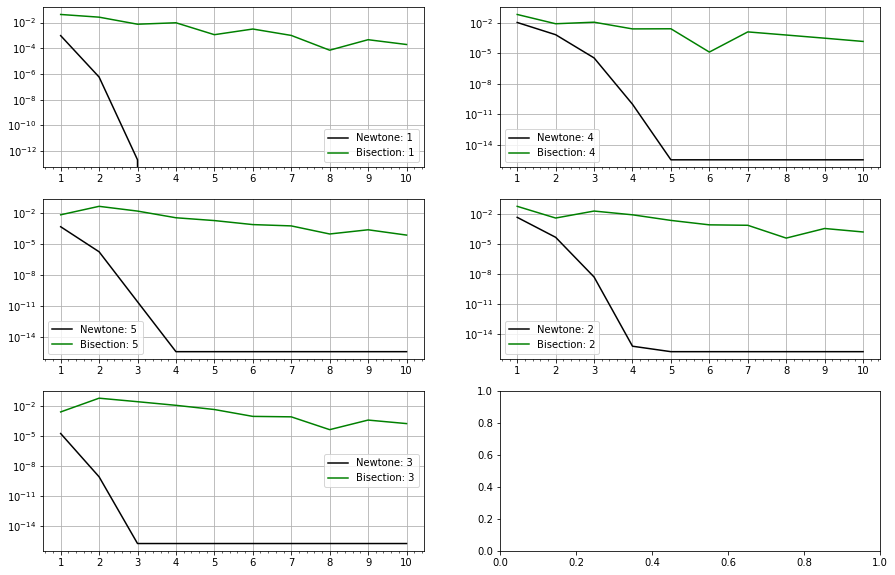

In [16]:
# Построение графиков

fig, axs = plt.subplots(3, 2, figsize = (15, 10))

x_data = np.linspace(0, 10, 10)

for i in range(5):
    axs[i % 3][i % 2].plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
            ModifiedNewtone((local_segments[i][0] + local_segments[i][1]) / 2, 10), 
                           color = 'black', label = f'Newtone: {i+1}')
    axs[i % 3][i % 2].plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ModifiedBisection(local_segments[i][0], local_segments[i][1], 10), 
                color = 'green', label = f'Bisection: {i+1}')
    axs[i % 3][i % 2].xaxis.set_major_locator(ticker.MultipleLocator(1))
    axs[i % 3][i % 2].minorticks_on()
    axs[i % 3][i % 2].grid(True)
    axs[i % 3][i % 2].legend()
    axs[i % 3][i % 2].set_yscale('log')


**Вывод** График модуля невязки еще раз подтверждает квадратичную сходимость метода Ньютона. Он сразу стремится вниз к нулевому значению. В то время как у метода Бисекции происходят периодически небольшие скачки вверх или вниз. Это связано с тем, что каждый раз меняется отрезок, то в отрезок входит левая точка текущей итерации, то не входит. Также график модуля невязки метода Бисекции достаточно слабо стремиться к нулевому значению по сравнению с методом Ньютона

## Задание 2.3 

Найти корни уравнения $ f(x) = 0 $ и определить их кратность

Заданное по условию уравнению:

$$ f(x) = 16(3 - 2 \sqrt{2}) \sqrt{2} ctg(x)  + 8 \pi + 16 \sqrt{2} (4x + 1) - 32 + 16 \pi x - \pi^2 - 64x^2 - 64x - 8 \sqrt{2} \pi$$

Для начала построим график данной функции, для того чтобы определить отрезки локализации

In [14]:
# Отрезок локализации
a = 0.2
b = 0.6
x_data = np.linspace(a, b, 10000)

# Функция, заданная по условию
def f(x):
    return (16 * (3 - 2 * math.sqrt(2)) * math.sqrt(2)) / (np.tan(x)) + 8 * math.pi+ 16 * math.sqrt(2) * (4 * x + 1) - 32 + 16 * math.pi * x - math.pi**2 - 64 * x * x - 64 * x  - 8 * math.sqrt(2) * math.pi

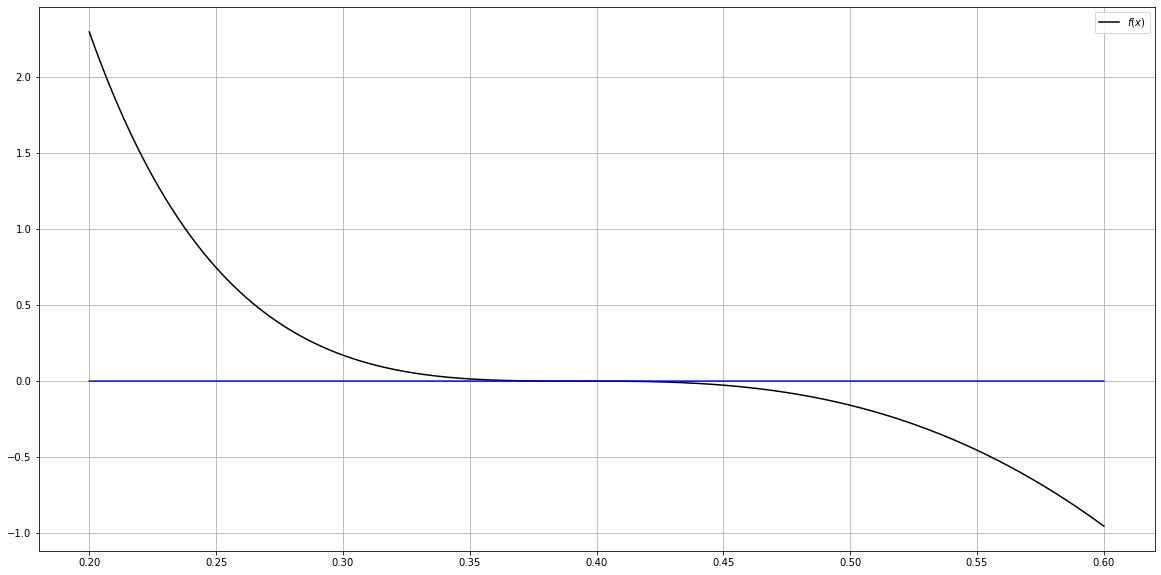

In [15]:
# Построение графика функции

fig, axs = plt.subplots(1, 1, figsize = (20, 10))

axs.plot(x_data, f(x_data), label = "$f(x)$", color = "black")
axs.plot(x_data, AxsX(x_data), color = "blue")

#axs.xaxis.set_major_locator(ticker.MultipleLocator())
#axs.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
#axs.minorticks_on()
axs.grid(True)

axs.legend()

Из построеного графика имеем, что уравнение имеет корень на отрезке $ [0,3, 0,5] $ - отрезок локализации

Для того, чтобы найти корень и саму кратность корня воспользуемся модифицированным методом Ньютона

Расчетная формула модифицированного метода Ньютона имеет следующий вид

$$ x_{n + 1} = x_n - m \cdot \frac{f(x_n)}{f^\prime(x_n)} $$

Где m - натуральное число. То значение m, при котором число итерации окажется наименьшим, должно быть кратностью корня

Условие окончания модифицированного метода Ньютона будет следующим

$\left|x_n - x_{n - 1} \right| \leq \varepsilon $

Осталось найти производную функции f(x). И можно воспользоваться модифицированным методом Ньютона

$$ f^\prime(x) = \frac{16(2\sqrt{2} - 3)\sqrt{2}}{\sin^2{x}} + 64 \sqrt{2} + 16 \pi - 128x -64 $$

Расчетная формула метода Ньютона примет следующий вид:

$$ x_{n + 1} = x_n - m \cdot \frac{16(3 - 2 \sqrt{2}) \sqrt{2} ctg(x_n)  + 8 \pi + 16 \sqrt{2} (4x_n + 1) - 32 + 16 \pi x_n - \pi^2 - 64x_n^2 - 64x_n - 8 \sqrt{2} \pi}{\frac{16(2\sqrt{2} - 3)\sqrt{2}}{\sin^2{x_n}} + 64 \sqrt{2} + 16 \pi - 128x_n - 64}$$

Начальное приближение возьмем равным $ x_0 = 0.33 $



In [19]:
# Формула для производной функции f(x)
def derivativef(x):
    return 16 * ((2 * math.sqrt(2) - 3) * math.sqrt(2)) / (np.sin(x) * np.sin(x)) + 64 * math.sqrt(2) + 16 * math.pi - 128 * x - 64 

# Формула для модифицированного метода Ньютона
def NewtonIter(x, eps, m):
    it = 0
    x_n = x - m * f(x) / derivativef(x)
    while abs(x - x_n) > eps:
        x = x_n
        x_n = x - m * f(x) / derivativef(x)
        it += 1
    return (it, x)

# Массив итериции и значений корней
iters = [0] * 5
x = [0.0] * 5

# Начальное приближение
x_0 = 0.33

eps = 10 ** (-12)


for i in range(1, 6):
    iters[i - 1], x[i - 1] = NewtonIter(x_0, eps, i)
    #x_0 = 0.33

print("Число итерации", iters)
print("Найденные корни", x)

Число итерации [32, 9, 9, 38, 58]
Найденные корни [0.3926946686367238, 0.3926948448404283, 0.39269893638798226, 0.39270057343966563, 0.3927003186732059]


Экспериментально было установлено, что при $ m > 6 $ модифицированный метод Нюьтона начинает зацикливаться

Поэтому мы применили его для m от 1 до 5

Построим таблицу полученных результатов

Значение m | Начальное приближение | Найденное приближенное значение | Число итерации
--- | --- | --- | ---
1 | 0,33 | $ 0,3926946686367238 $ | 32
2 | 0,33 | $ 0,3926948448404283 $ | 9
3 | 0,33 | $ 0,39269893638798226 $ | 9
4 | 0,33 | $ 0,39270057343966563 $ | 38
5 | 0,33 | $ 0,3927003186732059 $ | 58

Из таблицы имеем следующий результат, так как минимальное число итераций равно 9, то значение m = 2 - кратность корня

**Ответ**: Кратность корня равна 2, найденное значение корня равно $ 0,392694844840 \pm 0,000000000001 $